# CO‚ÇÇ Emissions ‚Äî Step-by-Step Analysis

Read ‚Üí Inspect ‚Üí Clean ‚Üí Transform ‚Üí Visualize-Histogram by year ‚Üí Map Visualization ‚Üí Dashboard

In [2]:
import nbformat
from nbformat.sign import NotebookNotary
from pathlib import Path

nb_path = Path("Global_CO2_Analysis.ipynb")  # ÊîπÊàê‰Ω†ÁöÑÊñá‰ª∂ÂêçÊàñÁªùÂØπË∑ØÂæÑ
nb = nbformat.read(nb_path, as_version=4)

notary = NotebookNotary()  # ËØªÂèñÊú¨Êú∫ÁöÑ nbsignatures.db
is_trusted = notary.check_signature(nb)
print("Jupyter signature trusted:", is_trusted, "\nFile:", nb_path.resolve())


Jupyter signature trusted: False 
File: D:\Richard\Learning\IBM Data Analyst\Activity_IBM_Data_Analyst\Course_8_Data_Visualization_with_Python\Global_CO2_Analysis\notebooks\Global_CO2_Analysis.ipynb


In [3]:
from IPython.display import HTML
HTML("""
<div id='x' style='padding:8px;border:1px solid #ccc'>
  If you can see this message and an alert pops up below, it means the Jupyter Notebook frontend has been trusted successfully.

</div>
<script>
  setTimeout(()=>alert('JS executes correctly, it means the notebook frontend has been trusted and rendering is working properly'), 200);
</script>
""")

In [4]:

# %pip install pandas numpy matplotlib seaborn plotly folium jupyter-dash requests
import os, json, pathlib, warnings, math
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from jupyter_dash import JupyterDash
from dash import Dash, html, dcc, Input, Output

pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (8,5)

DATA_PATH = pathlib.Path("../data/co2_emissions.csv")


In [5]:
%matplotlib inline

In [6]:
COLUMN_GUESSES = {
    "country": ["country","Country","entity","Entity","name","Name"],
    "year": ["year","Year","YEAR"],
    "total_co2": ["co2","CO2","total_co2","total_emissions","emissions","Total_CO2","Total Emissions"],
    "sector_candidates": ["coal_co2","oil_co2","gas_co2","cement_co2","flaring_co2","other_industry_co2",
                          "power_industry_co2","transport_co2","residential_co2","industrial_co2"],
    "region": ["region","Region","continent","Continent","country_group","group"]
}
def pick_first_col(df: pd.DataFrame, candidates: List[str]):
    for c in candidates:
        if c in df.columns: return c
    return None

In [7]:
df_raw = pd.read_csv(DATA_PATH)
df_raw.head()

Description         Name  year iso_code  population  gdp  cement_co2  \
0     Country  Afghanistan  1850      AFG   3752993.0  NaN         0.0   
1     Country  Afghanistan  1851      AFG   3767956.0  NaN         0.0   
2     Country  Afghanistan  1852      AFG   3783940.0  NaN         0.0   
3     Country  Afghanistan  1853      AFG   3800954.0  NaN         0.0   
4     Country  Afghanistan  1854      AFG   3818038.0  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  \
0                    0.0  NaN             NaN              NaN   
1                    0.0  NaN             NaN              NaN   
2                    0.0  NaN             NaN              NaN   
3                    0.0  NaN             NaN              NaN   
4                    0.0  NaN             NaN              NaN   

   co2_including_luc  co2_including_luc_growth_abs  \
0                NaN                           NaN   
1                NaN                           NaN   
2                NaN                           NaN   
3                NaN                           NaN   
4                NaN                           NaN   

   co2_including_luc_growth_prct  co2_including_luc_per_capita  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

   co2_including_luc_per_gdp  co2_including_luc_per_unit_energy  \
0                        NaN                                NaN   
1                        NaN                                NaN   
2                        NaN                                NaN   
3                        NaN                                NaN   
4                        NaN                                NaN   

   co2_per_capita  co2_per_gdp  co2_per_unit_energy  coal_co2  \
0             NaN          NaN                  NaN       NaN   
1             NaN          NaN                  NaN       NaN   
2             NaN          NaN                  NaN       NaN   
3             NaN          NaN                  NaN       NaN   
4             NaN          NaN                  NaN       NaN   

   coal_co2_per_capita  consumption_co2  consumption_co2_per_capita  \
0                  NaN              NaN                         NaN   
1                  NaN              NaN                         NaN   
2                  NaN              NaN                         NaN   
3                  NaN              NaN                         NaN   
4                  NaN              NaN                         NaN   

   consumption_co2_per_gdp  cumulative_cement_co2  cumulative_co2  \
0                      NaN                    0.0             NaN   
1                      NaN                    0.0             NaN   
2                      NaN                    0.0             NaN   
3                      NaN                    0.0             NaN   
4                      NaN                    0.0             NaN   

   cumulative_co2_including_luc  cumulative_coal_co2  cumulative_flaring_co2  \
0                           NaN                  NaN                     NaN   
1                           NaN                  NaN                     NaN   
2                           NaN                  NaN                     NaN   
3                           NaN                  NaN                     NaN   
4                           NaN                  NaN                     NaN   

   cumulative_gas_co2  cumulative_luc_co2  cumulative_oil_co2  \
0                 NaN               2.993                 NaN   
1                 NaN               6.008                 NaN   
2                 NaN               9.043                 NaN   
3                 NaN              12.095                 NaN

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                                   37921 non-null  object 
 4   population                                 37965 non-null  float64
 5   gdp                                        14989 non-null  float64
 6   cement_co2                                 23612 non-null  float64
 7   cement_co2_per_capita                      22715 non-null  float64
 8   co2                                        27059 non-null  float64
 9   co2_growth_abs                             24987 non-null  float64
 10  co2_growth_prct       

In [9]:
df_raw.dtypes

Description                     object
Name                            object
year                             int64
iso_code                        object
population                     float64
                                ...   
temperature_change_from_n2o    float64
total_ghg                      float64
total_ghg_excluding_lucf       float64
trade_co2                      float64
trade_co2_share                float64
Length: 80, dtype: object

In [10]:
df_raw.describe()

year    population           gdp    cement_co2  \
count  43746.000000  3.796500e+04  1.498900e+04  23612.000000   
mean    1936.641727  5.739481e+07  3.351123e+11      9.495191   
std       50.243385  3.301779e+08  3.112988e+12     69.088018   
min     1850.000000  2.150000e+02  4.998000e+07      0.000000   
25%     1893.000000  3.324760e+05  7.955879e+09      0.000000   
50%     1937.000000  2.432030e+06  2.754978e+10      0.033000   
75%     1980.000000  9.670886e+06  1.248960e+11      0.895250   
max     2023.000000  8.091735e+09  1.301130e+14   1696.308000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           22715.000000  27059.000000    24987.000000     24668.000000   
mean                0.065905    446.602788        6.664167        44.661670   
std                 0.125343   2015.844863       64.737394      1775.507928   
min                 0.000000      0.000000    -1977.750000      -100.000000   
25%                 0.000000      0.487000       -0.011000        -1.280250   
50%                 0.006000      5.522000        0.051000         3.919500   
75%                 0.090000     60.021000        1.131500        11.035750   
max                 2.484000  37791.570000     1865.208000    180870.000000   

       co2_including_luc  co2_including_luc_growth_abs  \
count       23585.000000                  23285.000000   
mean          535.581202                      7.214604   
std          2202.219657                     99.347980   
min           -99.693000                  -2325.500000   
25%             6.418000                     -0.908000   
50%            27.691000                      0.078000   
75%           123.959000                      2.620000   
max         41416.480000                   2340.184000   

       co2_including_luc_growth_prct  co2_including_luc_per_capita  \
count                   23285.000000                  23495.000000   
mean                        3.539208                      7.223101   
std                       268.082338                      9.254779   
min                    -16151.107000                    -13.907000   
25%                        -4.412000                      1.973500   
50%                         0.976000                      4.501000   
75%                         6.297000                      9.296500   
max                     16646.543000                    364.706000   

       co2_including_luc_per_gdp  co2_including_luc_per_unit_energy  \
count               16790.000000                        9701.000000   
mean                    2.404175                           1.073606   
std                     5.912516                           5.001297   
min                    -6.469000                          -8.476000   
25%                     0.392000                           0.200000   
50%                     0.869000                           0.277000   
75%                     2.104000                           0.707000   
max                   291.947000                         351.719000   

       co2_per_capita   co2_per_gdp  co2_per_unit_energy      coal_co2  \
count    24868.000000  16989.000000         10350.000000  20372.000000   
mean         4.003911      0.404872             0.239634    195.289335   
std         14.733964      0.763448             0.257531    869.390978   
min          0.000000      0.000000             0.000000      0.000000   
25%          0.210000      0.137000             0.175000      0.068000   
50%          1.162000      0.269000             0.216000      1.959500   
75%          4.563000      0.513000             0.256000     28.674500   
max        782.682000     82.576000            10.686000  15401.220000   

       coal_co2_per_capita  consumption_co2  consumption_co2_per_capita  \
count         20040.000000      4866.000000                 4502.000000   
mean              1.339065      1319.189543                    6.401285   
std               2.402853     

In [11]:
print("\n=== dtypes ==="); print(df_raw.dtypes)
print("\n=== info() ==="); df_raw.info()
print("\n=== describe() ==="); display(df_raw.describe())
print("\n=== missing values ==="); display(df_raw.isna().sum().sort_values(ascending=False))


=== dtypes ===
Description                     object
Name                            object
year                             int64
iso_code                        object
population                     float64
                                ...   
temperature_change_from_n2o    float64
total_ghg                      float64
total_ghg_excluding_lucf       float64
trade_co2                      float64
trade_co2_share                float64
Length: 80, dtype: object

=== info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                               

year    population           gdp    cement_co2  \
count  43746.000000  3.796500e+04  1.498900e+04  23612.000000   
mean    1936.641727  5.739481e+07  3.351123e+11      9.495191   
std       50.243385  3.301779e+08  3.112988e+12     69.088018   
min     1850.000000  2.150000e+02  4.998000e+07      0.000000   
25%     1893.000000  3.324760e+05  7.955879e+09      0.000000   
50%     1937.000000  2.432030e+06  2.754978e+10      0.033000   
75%     1980.000000  9.670886e+06  1.248960e+11      0.895250   
max     2023.000000  8.091735e+09  1.301130e+14   1696.308000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           22715.000000  27059.000000    24987.000000     24668.000000   
mean                0.065905    446.602788        6.664167        44.661670   
std                 0.125343   2015.844863       64.737394      1775.507928   
min                 0.000000      0.000000    -1977.750000      -100.000000   
25%                 0.000000      0.487000       -0.011000        -1.280250   
50%                 0.006000      5.522000        0.051000         3.919500   
75%                 0.090000     60.021000        1.131500        11.035750   
max                 2.484000  37791.570000     1865.208000    180870.000000   

       co2_including_luc  co2_including_luc_growth_abs  \
count       23585.000000                  23285.000000   
mean          535.581202                      7.214604   
std          2202.219657                     99.347980   
min           -99.693000                  -2325.500000   
25%             6.418000                     -0.908000   
50%            27.691000                      0.078000   
75%           123.959000                      2.620000   
max         41416.480000                   2340.184000   

       co2_including_luc_growth_prct  co2_including_luc_per_capita  \
count                   23285.000000                  23495.000000   
mean                        3.539208                      7.223101   
std                       268.082338                      9.254779   
min                    -16151.107000                    -13.907000   
25%                        -4.412000                      1.973500   
50%                         0.976000                      4.501000   
75%                         6.297000                      9.296500   
max                     16646.543000                    364.706000   

       co2_including_luc_per_gdp  co2_including_luc_per_unit_energy  \
count               16790.000000                        9701.000000   
mean                    2.404175                           1.073606   
std                     5.912516                           5.001297   
min                    -6.469000                          -8.476000   
25%                     0.392000                           0.200000   
50%                     0.869000                           0.277000   
75%                     2.104000                           0.707000   
max                   291.947000                         351.719000   

       co2_per_capita   co2_per_gdp  co2_per_unit_energy      coal_co2  \
count    24868.000000  16989.000000         10350.000000  20372.000000   
mean         4.003911      0.404872             0.239634    195.289335   
std         14.733964      0.763448             0.257531    869.390978   
min          0.000000      0.000000             0.000000      0.000000   
25%          0.210000      0.137000             0.175000      0.068000   
50%          1.162000      0.269000             0.216000      1.959500   
75%          4.563000      0.513000             0.256000     28.674500   
max        782.682000     82.576000            10.686000  15401.220000   

       coal_co2_per_capita  consumption_co2  consumption_co2_per_capita  \
count         20040.000000      4866.000000                 4502.000000   
mean              1.339065      1319.189543                    6.401285   
std               2.402853     


=== missing values ===


share_global_other_co2                  41638
share_global_cumulative_other_co2       41638
other_co2_per_capita                    41282
cumulative_other_co2                    40844
other_industry_co2                      40844
                                        ...  
share_of_temperature_change_from_ghg     2918
temperature_change_from_co2              2918
Description                                 0
Name                                        0
year                                        0
Length: 80, dtype: int64

In [12]:
# 2) ÊúâÂì™‰∫õÂÆû‰ΩìÁ±ªÂûãÔºàCountry/Region/Continent/World/International_Sector...Ôºâ
df_raw['Description'].dropna().value_counts()

Description
Country                 34451
Special_Territory        3643
Region                   3530
Economic_Group           1740
International_Sector      382
Name: count, dtype: int64

In [13]:
# 3) country/Âú∞Âå∫Êï∞ÈáèÔºà‰ª• Country Ë°åËÆ°Ôºâ
n_countries = df_raw.loc[df_raw['Description']=='Country', 'Name'].nunique()
n_countries

198

In [14]:
df_world = df_raw[df_raw["Name"].str.lower() == "world"]
df_world.head()
# df_world['Description'].value_counts()

Description   Name  year iso_code    population           gdp  \
37807      Region  World  1850      NaN  1.287034e+09  1.546680e+12   
37808      Region  World  1851      NaN           NaN           NaN   
37809      Region  World  1852      NaN           NaN           NaN   
37810      Region  World  1853      NaN           NaN           NaN   
37811      Region  World  1854      NaN           NaN           NaN   

       cement_co2  cement_co2_per_capita      co2  co2_growth_abs  \
37807         NaN                    NaN  196.848          11.800   
37808         NaN                    NaN  198.779           1.931   
37809         NaN                    NaN  207.595           8.817   
37810         NaN                    NaN  217.237           9.642   
37811         NaN                    NaN  255.039          37.802   

       co2_growth_prct  co2_including_luc  co2_including_luc_growth_abs  \
37807            6.376           2835.459                           NaN   
37808            0.981           3018.492                       183.033   
37809            4.435           3065.094                        46.601   
37810            4.645           3122.835                        57.741   
37811           17.401           3169.879                        47.044   

       co2_including_luc_growth_prct  co2_including_luc_per_capita  \
37807                            NaN                         2.203   
37808                          6.455                           NaN   
37809                          1.544                           NaN   
37810                          1.884                           NaN   
37811                          1.506                           NaN   

       co2_including_luc_per_gdp  co2_including_luc_per_unit_energy  \
37807                      1.833                                NaN   
37808                        NaN                                NaN   
37809                        NaN                                NaN   
37810                        NaN                                NaN   
37811                        NaN                                NaN   

       co2_per_capita  co2_per_gdp  co2_per_unit_energy  coal_co2  \
37807           0.153        0.127                  NaN   196.848   
37808             NaN          NaN                  NaN   198.779   
37809             NaN          NaN                  NaN   207.595   
37810             NaN          NaN                  NaN   217.237   
37811             NaN          NaN                  NaN   255.039   

       coal_co2_per_capita  consumption_co2  consumption_co2_per_capita  \
37807                0.153              NaN                         NaN   
37808                  NaN              NaN                         NaN   
37809                  NaN              NaN                         NaN   
37810                  NaN              NaN                         NaN   
37811                  NaN              NaN                         NaN   

       consumption_co2_per_gdp  cumulative_cement_co2  cumulative_co2  \
37807                      NaN                    NaN        4769.853   
37808                      NaN                    NaN        4968.631   
37809                      NaN                    NaN        5176.226   
37810                      NaN                    NaN        5393.463   
37811                      NaN                    NaN        5648.502   

       cumulative_co2_including_luc  cumulative_coal_co2  \
37807                      2835.459             4769.853   
37808                      5853.951             4968.631   
37809                      8919.044             5176.226   
37810                     12041.880             5393.463   
37811                     15211.758             5648.502   

       cumulative_flaring_co2  cumulative_gas_co2  cumulative_luc_co2  \
37807                     NaN                 NaN            2638.611   
37808                     NaN                 NaN    

In [15]:
# 4) countryÂ±ÇÈù¢ÁöÑyearË¶ÜÁõñÔºàÊúÄÊó©/ÊúÄÊôöÂπ¥Ôºâ
country_year_min = df_raw.loc[df_raw['Description']=='Country', 'year'].min()
country_year_max = df_raw.loc[df_raw['Description']=='Country', 'year'].max()
country_year_min, country_year_max

(np.int64(1850), np.int64(2023))

In [16]:
# 5) Ëã•Â≠òÂú®Â§ßÊ¥≤/Âå∫ÂüüÔºöÂàÜÂà´ÁúãÁúãÊï∞Èáè‰∏éyearË¶ÜÁõñ
for desc in ['Region','Continent','World','International_Sector']:
    if (df_raw['Description']==desc).any():
        print(f'[{desc}] Êï∞Èáè =', df_raw.loc[df_raw['Description']==desc, 'Name'].nunique(),
              '; Âπ¥‰ªΩ =', int(df_raw.loc[df_raw['Description']==desc, 'year'].min()),
              '‚Äì', int(df_raw.loc[df_raw['Description']==desc, 'year'].max()))

[Region] Êï∞Èáè = 21 ; Âπ¥‰ªΩ = 1850 ‚Äì 2023
[International_Sector] Êï∞Èáè = 3 ; Âπ¥‰ªΩ = 1850 ‚Äì 2023


In [17]:
# outputÊâÄÊúâÂ§ßÊ¥≤ÁöÑÂîØ‰∏ÄcolumnË°®
region = df_raw.loc[df_raw['Description'] == 'Region', 'Name'].unique().tolist()
continents = df_raw.loc[df_raw['Description'] == 'Continen', 'Name'].unique().tolist()
world = df_raw.loc[df_raw['Description'] == 'World', 'Name'].unique().tolist()
International_Sector = df_raw.loc[df_raw['Description'] == 'International_Sector', 'Name'].unique().tolist()

print('region', region)
print('continents', continents)
print('world', world)    
print('International_Sector', International_Sector)

region ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)', 'Europe', 'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'Middle East (GCP)', 'North America', 'North America (GCP)', 'North America (excl. USA)', 'Oceania', 'Oceania (GCP)', 'Ryukyu Islands', 'Ryukyu Islands (GCP)', 'South America', 'South America (GCP)', 'World']
continents []
world []
International_Sector ['International aviation', 'International shipping', 'International transport']


In [18]:
# 6) ‰Ω†ÂÖ≥Ê≥®ÁöÑ‚ÄúÊòØÂê¶ÈÉΩÊúâ‚ÄùÔºöÂú®‰∏çÂêåÂÆû‰Ωì‰∏äÁúãÂÖ≥ÈîÆcolumnÁöÑÈùûÁ©∫Âç†ÊØî,ÂÆÉÂõûÁ≠î‚Äî‚Äî‚ÄúÂú® Country / Region / Continent / International_Sector Á≠âÊØè‰∏ÄÁ±ªÂÆû‰Ωì‰∏äÔºåco2 / co2_including_luc / consumption_co2 Ëøô‰∫õcolumnÊúâÊ≤°ÊúâÊï∞ÊçÆ„ÄÅÁº∫Â§öÂ∞ë
key_cols = ['co2','co2_including_luc','consumption_co2']
for desc in df_raw['Description'].dropna().unique():
    sub = df_raw[df_raw['Description']==desc]
    print(f'\n== {desc} ==')
    for c in key_cols:
        if c in df_raw.columns:
            coverage = sub[c].notna().mean()
            print(f'{c:22s} ÈùûÁ©∫Âç†ÊØî: {coverage: .2%} (rows={len(sub)})')


== Country ==
co2                    ÈùûÁ©∫Âç†ÊØî:  60.64% (rows=34451)
co2_including_luc      ÈùûÁ©∫Âç†ÊØî:  60.05% (rows=34451)
consumption_co2        ÈùûÁ©∫Âç†ÊØî:  11.34% (rows=34451)

== Region ==
co2                    ÈùûÁ©∫Âç†ÊØî:  93.77% (rows=3530)
co2_including_luc      ÈùûÁ©∫Âç†ÊØî:  52.92% (rows=3530)
consumption_co2        ÈùûÁ©∫Âç†ÊØî:  17.79% (rows=3530)

== Economic_Group ==
co2                    ÈùûÁ©∫Âç†ÊØî:  76.03% (rows=1740)
co2_including_luc      ÈùûÁ©∫Âç†ÊØî:  56.03% (rows=1740)
consumption_co2        ÈùûÁ©∫Âç†ÊØî:  15.17% (rows=1740)

== Special_Territory ==
co2                    ÈùûÁ©∫Âç†ÊØî:  38.05% (rows=3643)
co2_including_luc      ÈùûÁ©∫Âç†ÊØî:  1.48% (rows=3643)
consumption_co2        ÈùûÁ©∫Âç†ÊØî:  0.91% (rows=3643)

== International_Sector ==
co2                    ÈùûÁ©∫Âç†ÊØî:  38.74% (rows=382)
co2_including_luc      ÈùûÁ©∫Âç†ÊØî:  0.00% (rows=382)
consumption_co2        ÈùûÁ©∫Âç†ÊØî:  8.90% (rows=382)


In [19]:

# Data CleanÔºöStandardize column name„ÄÅIdentify key columns„ÄÅRemove duplicate rows„ÄÅNormalize year values„ÄÅHandle negative values
df = df_raw.copy()
df.columns = [c.strip() for c in df.columns]     # ÂéªÈô§ÊâÄÊúâÂàóÂêçÈ¶ñÂ∞æÁ©∫ÁôΩÂ≠óÁ¨¶ÔºåÈÅøÂÖç‚ÄúÂêåÂêç‰∏çÂêåÁ©∫Ê†º‚ÄùÁöÑÈóÆÈ¢ò

# ÔºàÂ¶ÇÊûú‰Ω†Â∑≤ÁªèÂú®Âà´Â§ÑÂÆö‰πâËøáÔºåÂ∞±‰ºöË∑≥ËøáÔºâ
if "description" not in COLUMN_GUESSES:
    COLUMN_GUESSES["description"] = [
        "Description", "description",  # ‰Ω†Ëøô‰ªΩÊï∞ÊçÆÈáåÁî®ÁöÑÊòØ 'Description'
        "Type", "type",                # Â§áÈÄâÔºöÊúâ‰∫õÊï∞ÊçÆ‰ºöÁî® Type Êù•Ë°®Á§∫ Country/Region/World Á≠âÂàÜÁ±ª
        "Category", "category"
    ]

# --- 1) ËØÜÂà´ Description Âàó ---
description_col = pick_first_col(df, COLUMN_GUESSES["description"])

# Áªü‰∏ÄÊ∏ÖÊ¥ó Description ÁöÑÂ≠óÁ¨¶‰∏≤Ôºå‰æø‰∫éÂêéÁª≠Âà§Êñ≠/ÂàÜÁªÑÔºà‰øùÁïôÂéüÂÄºÂú®Âè¶‰∏ÄÂàóÂèØÈÄâÔºâ
if description_col is not None:
    # ÂèØÈÄâÔºö‰øùÁïôÂéüÂßãÂàó‰ª•Â§áÊü•
    # df[description_col + "_raw"] = df[description_col]
    df[description_col] = (
        df[description_col]
        .astype(str)            # ËΩ¨‰∏∫Â≠óÁ¨¶‰∏≤
        .str.strip()            # ÂéªÈ¶ñÂ∞æÁ©∫ÁôΩ
        .str.replace(r"\s+", " ", regex=True)  # ÂéãÁº©Â§öÁ©∫Ê†º
    )


# ‰ªéÂÄôÈÄâcolumnÂêçcolumnË°®ÈáåÊåëÂá∫ Á¨¨‰∏Ä‰∏™matchÂà∞ÁöÑ column‰Ωú‰∏∫‚Äúcountrycolumn / yearcolumn‚Äù„ÄÇ
country_col = pick_first_col(df, COLUMN_GUESSES["country"])
year_col    = pick_first_col(df, COLUMN_GUESSES["year"])

# ‰ªé‚ÄúÊÄªemissionsÈáè‚ÄùÁöÑÂÄôÈÄâÈáåÁ≠õÈÄâÂá∫ÂÆûÈôÖÂ≠òÂú®ÁöÑcolumnÂêçÔºåÂèñÁ¨¨‰∏Ä‰∏™‰Ωú‰∏∫ total_colÔºõËã•Êó†Âàô None
tc = [c for c in COLUMN_GUESSES["total_co2"] if c in df.columns]
total_col = tc[0] if tc else None

# ÊâæÂá∫ÊâÄÊúâÂ≠òÂú®ÁöÑ‚ÄúÈÉ®Èó®/Ë°å‰∏öemissions‚ÄùcolumnÔºàÂèØËÉΩÊúâÂ§öcolumnÔºå‰øùÁïô‰∏∫columnË°®Ôºâ„ÄÇ
sector_cols = [c for c in COLUMN_GUESSES["sector_candidates"] if c in df.columns]

# ÂäüËÉΩÔºöËØÜÂà´‚ÄúÂå∫Âüü/Â§ßÊ¥≤‚ÄùcolumnÔºàÂ¶Ç continent, region Á≠âÔºâ„ÄÇ
region_col  = pick_first_col(df, COLUMN_GUESSES["region"])

print("ËØÜÂà´ÁªìÊûú:", description_col,country_col, year_col, total_col, sector_cols[:5], region_col)



ËØÜÂà´ÁªìÊûú: Description Name year co2 ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2'] None


In [20]:
# ‰øùÂ≠òÊ∏ÖÊ¥óÂâçÁöÑÂΩ¢Áä∂ (Ë°åÊï∞, columnÊï∞) ‰ª•‰æøÂØπÊØî„ÄÇ
before = df.shape

df = df.drop_duplicates()   #ÂéªÈô§Êï¥Ë°åÂÆåÂÖ®Áõ∏ÂêåÁöÑÈáçÂ§çËÆ∞ÂΩï„ÄÇ

if year_col:
    df[year_col] = pd.to_numeric(df[year_col], errors="coerce")   #Âπ¥‰ªΩËΩ¨Êï∞Â≠óÔºöÂ∞ÜÂ≠óÁ¨¶‰∏≤Âπ¥‰ªΩËΩ¨Êï∞ÂÄºÔºõÈùûÊ≥ïÂÄºÂèò NaNÔºàerrors='coerce'Ôºâ
    df = df.dropna(subset=[year_col])                             #Âà†Èô§Êó†Âπ¥‰ªΩÔºöÂπ¥‰ªΩ‰∏∫ NaN ÁöÑË°å
    df = df[df[year_col] > 0]                                     #ËøáÊª§Âπ¥‰ªΩÔºöÂè™‰øùÁïôÂπ¥‰ªΩ > 0 ÁöÑË°å  


df = df.dropna(how="all")                  #Âà†Èô§ÂÖ®Á©∫Ë°å, how='all'Ôºö‰ªÖÂΩìËØ•Ë°åÊâÄÊúâÂàóÈÉΩÊòØ NaN ÊâçÂà†Èô§„ÄÇ
print("Shape after cleaning:", before, "->", df.shape)  # Display the shape change before and after cleaning (rows, columns)



Shape after cleaning: (43746, 80) -> (43746, 80)


In [21]:
if total_col:
    df[total_col] = pd.to_numeric(df[total_col], errors="coerce")  #Â∞Ü‚ÄúÊÄªÊéíÊîæ‚ÄùÂàóËΩ¨‰∏∫Êï∞Â≠óÔºåÈùûÊ≥ïÂÄºÂèò NaN
    neg = (df[total_col] < 0).sum(skipna=True)  #Â∏ÉÂ∞î Series ÂèØ‰∏é .sum() ÁªÑÂêàÔºåTrue ËÆ°‰∏∫ 1„ÄÇsum(skipna=True) ÈªòËÆ§Ë∑≥Ëøá NaN
    print("Total number of negative emission values:", int(neg))  # Count of negative values in the emissions column
# ÊÑè‰πâÔºöCO‚ÇÇ emissionsÈÄöÂ∏∏‰∏çÂ∫î‰∏∫Ë¥üÔºåË¥üÂÄºÂ§öÂçäË°®Á§∫ÂΩïÂÖ•ÈîôËØØÊàñ‰∏çÂêåÂè£ÂæÑÔºàÂ¶ÇÂáÄÊ∏ÖÈô§ÈáèÔºâÔºåÈúÄË¶ÅÂÜ≥Á≠ñÂ§ÑÁêÜ„ÄÇ

Total number of negative emission values: 0


### Data cleaning completed.
### Select only the required columns to create a new working DataFrame       
### df_min = df[need_cols].copy()


In [23]:

# ÈÄâÊã©ÂøÖË¶Åcolumn + ÂèòÊç¢Ôºàminmax / zscore / log1pÔºâ
# 1. ‰øùÁïô‰∫ÜÊúÄÈáçË¶ÅÁöÑÂá†columnÔºöcountry„ÄÅyear„ÄÅÊÄªemissionsÈáèÔºàco2Ôºâ„ÄÅÂå∫ÂüüÔºàifÊúâÔºâÔºåÁîüÊàêÊñ∞ÁöÑ DataFrame df_minÔºå
need_cols = [c for c in [description_col,country_col, year_col, total_col, region_col] if c is not None]
df_min = df[need_cols].copy()   #Âü∫‰∫éÂøÖË¶ÅÂàóÊûÑÂª∫‰∏Ä‰∏™Â≠ê DataFrameÔºåÂπ∂Â§çÂà∂‰∏Ä‰ªΩ‰ª•ÂÖçÂêéÁª≠‰øÆÊîπÂΩ±ÂìçÂéü df

# 2. ÊääcolumnÂÆâÂÖ®Âú∞ËΩ¨ÊàêÊï∞ÂÄº
x = pd.to_numeric(df_min[total_col], errors="coerce").astype(float)   
# df_min[total_col]ÔºöÂèñÂá∫‰Ω†ÈÄâÁöÑ‚ÄúÊÄªemissionsÈáè‚ÄùcolumnÔºàÊØîÂ¶Ç co2Ôºâ;
# pd.to_numeric(..., errors="coerce")ÔºöËÉΩËΩ¨ÊàêÊï∞ÁöÑÔºàÂ¶Ç 123„ÄÅ"4.56"ÔºâÂ∞±ËΩ¨ÊàêÂØπÂ∫îÁöÑÊï∞Ôºõ‰∏çËÉΩËΩ¨ÁöÑÔºàÂ¶ÇÁ©∫Â≠óÁ¨¶‰∏≤„ÄÅ"N/A"„ÄÅÂåÖÂê´ÈÄóÂè∑ÁöÑ "1,234" Á≠âÔºâ‰ºöË¢´Âº∫Âà∂ÂèòÊàê NaNÔºàËøôÂ∞±ÊòØ coerce ÁöÑÊÑèÊÄùÔºâ„ÄÇ
# .astype(float)ÔºöÂÜçÊòéÁ°ÆÊàê float64 Á±ªÂûãÔºåÊñπ‰æøÂêéÈù¢ÂÅöÊï∞ÂÄºËøêÁÆó„ÄÇ


# 3. ËÆ°ÁÆóÊúÄÂ∞èÂÄº„ÄÅÊúÄÂ§ßÂÄºÔºàÂøΩÁï• NaNÔºâÔºåÂùáÂÄº„ÄÅÊ†áÂáÜÂ∑ÆÔºàÂøΩÁï• NaNÔºâ
mn, mx = np.nanmin(x), np.nanmax(x)
mu, sd = np.nanmean(x), np.nanstd(x, ddof=0)




### Use df_feat as the main DataFrame for downstream analysis

In [24]:
# df_feat = df_min.copy()        # Â§çÂà∂‰∏Ä‰ªΩ df_min ‰ª•‰æøÊñ∞Â¢ûÂàó

# Â§çÂà∂‰∏Ä‰ªΩ df_min ‰ª•‰æøÊñ∞Â¢ûÂàó,Â§çÂà∂Êó∂Âä†ËøáÊª§Êù°‰ª∂ÔºåÂè™‰øùÁïô Description == "Country" ÁöÑË°å
df_feat = df_min[df_min[description_col].str.lower() == "country"].copy()


In [25]:
# Êñ∞Â¢ûcolumn: total_minmax / total_zscore / total_log1p
# Min-Max ÂΩí‰∏ÄÂåñ
df_feat["total_minmax"] = (x - mn) / (mx - mn) if mx>mn else np.nan     #ÊâÄÊúâÊï∞ÂÄº‰ºöË¢´Á∫øÊÄßÊò†Â∞ÑÂà∞ 0 ~ 1 Âå∫Èó¥„ÄÇ

# Z-Score Ê†áÂáÜÂåñ
df_feat["total_zscore"] = (x - mu) / sd if sd>0 else np.nan                   #ÂùáÂÄº‰∏∫ 0ÔºåÊ†áÂáÜÂ∑Æ‰∏∫ 1 ÁöÑÂàÜÂ∏É

# ÂØπÊï∞ÂèòÊç¢Ôºàlog1pÔºâ
df_feat["total_log1p"] = np.log1p(x.clip(lower=0))           #ÂØπÊï∞ÂèòÊç¢Ôºålog1p ÊòØ log(1+x) ÁöÑÁº©ÂÜôÔºåËÉΩÂ§ÑÁêÜ x=0 ÁöÑÊÉÖÂÜµ„ÄÇË¥üÂÄºË¢´Ë£ÅÂâ™‰∏∫ 0„ÄÇ

print("Êñ∞Â¢ûÂàó: total_minmax / total_zscore / total_log1p")
display(df_feat.head())

Êñ∞Â¢ûÂàó: total_minmax / total_zscore / total_log1p


Description         Name  year  co2  total_minmax  total_zscore  total_log1p
0     Country  Afghanistan  1850  NaN           NaN           NaN          NaN
1     Country  Afghanistan  1851  NaN           NaN           NaN          NaN
2     Country  Afghanistan  1852  NaN           NaN           NaN          NaN
3     Country  Afghanistan  1853  NaN           NaN           NaN          NaN
4     Country  Afghanistan  1854  NaN           NaN           NaN          NaN

In [26]:

# Part1: Histogram by yearÔºàMatplotlib / Seaborn / PlotlyÔºâ
assert year_col   # Á°Æ‰øùÊúâÂπ¥‰ªΩÂàó assert year_col ÊòØ‰∏ÄÁßç‰øùÊä§Êé™ÊñΩÔºöÂº∫Âà∂Ë¶ÅÊ±Ç‚ÄúÂπ¥‰ªΩÂàóÂøÖÈ°ªËØÜÂà´ÊàêÂäü‚ÄùÔºåÂê¶ÂàôÁ®ãÂ∫èÂ∞±Á´ãÂàªÊä•ÈîôÔºåÊèêÈÜí‰Ω†Ê£ÄÊü•Êï∞ÊçÆÔºåËÄå‰∏çÊòØÁªßÁª≠ËøêË°å‰∫ßÁîüÊõ¥ÈöêÊô¶ÁöÑ bug„ÄÇassert Êù°‰ª∂ ÁöÑÊÑèÊÄùÊòØÔºöÊ£ÄÊü•Êù°‰ª∂ÊòØÂê¶‰∏∫Áúü„ÄÇ

years_all = sorted(df_feat[year_col].dropna().unique().astype(int))     # ÂèñÂá∫ÊâÄÊúâÂ≠òÂú®ÁöÑÂπ¥‰ªΩÔºåËΩ¨‰∏∫Êï¥Êï∞Âπ∂ÊéíÂ∫è „ÄÇdropna() ÂéªÊéâÁº∫Â§±Âπ¥‰ªΩÔºõunique() ÂéªÈáçÔºõastype(int) ËΩ¨ÊàêÊï¥Êï∞Ôºõ sorted() ÊéíÂ∫è ÂæóÂà∞ÊâÄÊúâÂ≠òÂú®Êï∞ÊçÆÁöÑÂπ¥‰ªΩÂàóË°® years_allÔºàÂçáÂ∫èÔºâ





In [27]:
rep = [y for y in [1880,1950,2000,int(max(years_all))] if y in years_all]   # È¢ÑËÆæ‰∏ÄÁªÑ‚Äú‰ª£Ë°®Âπ¥‰ªΩ‚ÄùÂÄôÈÄâÔºö1880,1950,2000,2020„ÄÅ‰ª•ÂèäÊï∞ÊçÆÈáåÁöÑÊúÄÊñ∞Âπ¥‰ªΩÔºåÂè™‰øùÁïôÂú®Êï∞ÊçÆ‰∏≠Á°ÆÂÆûÂ≠òÂú®ÁöÑÂπ¥‰ªΩ‰Ωú‰∏∫ rep

# if‰∏äÈù¢ÈÇ£ÁªÑ‰ª£Ë°®year‰∏Ä‰∏™ÈÉΩ‰∏çÂú®Êï∞ÊçÆÈáåÔºàÊûÅÂ∞ëËßÅÔºå‰ΩÜË¶ÅÂÖúÂ∫ïÔºâÔºåÂ∞±Âú®ÂÖ®ÈÉ®yearÈáåÂùáÂåÄÈááÊ†∑ k ‰∏™ÔºàÊúÄÂ§ö 4 ‰∏™ÔºâÔºå‰øùËØÅËá≥Â∞ëËÉΩÁîªÂá†Âº†‚ÄúË∑®Âπ¥ÂØπÊØî‚ÄùÁöÑhistogram„ÄÇ
# ËøôÊòØ‰ΩøÁî®‰∫Ü ‚ÄãNumPy Â∫ì‰∏≠ÁöÑ numpy.linspace ÂáΩÊï∞ÔºåÂÆÉÁöÑ‰ΩúÁî®ÊòØÔºö‚ÄãÂú®ÊåáÂÆöÁöÑÂå∫Èó¥ÂÜÖÔºåÁîüÊàêÊåáÂÆöÊï∞ÈáèÁöÑ„ÄÅÂùáÂåÄÈó¥ÈöîÔºàÁ≠âÂ∑ÆÔºâÁöÑÊï∞ÂÄº„ÄÇ        ‚Äãnp.linspace(Ëµ∑ÁÇπ, ÁªàÁÇπ, ÂÖÉÁ¥†‰∏™Êï∞, dtype=Êï∞ÊçÆÁ±ªÂûã)
if not rep:          
    import numpy as np
    k = min(4, len(years_all)); rep = [int(years_all[i]) for i in np.linspace(0,len(years_all)-1,k, dtype=int)]
print("Representative years:", rep)

Representative years: [1880, 1950, 2000, 2023]


## Visualizing CO‚ÇÇ Emissions Distribution Across Years

####
The following code generates histograms of total CO‚ÇÇ emissions per country for several representative years.
These visualizations help explore how the shape of the distribution evolves over time, providing insight from different angles:

üîç Key analytical questions:

Trends in typical country emissions:
Do median or average countries show an upward or downward trend in emissions?

Emergence of high-emission countries:
Are more countries concentrated in the right-hand (long tail) side of the distribution?

Variation between countries:
Is the gap between countries widening or narrowing?

Multi-modal distribution:
Are there multiple peaks, possibly indicating distinct clusters of countries (e.g., developed vs. developing economies)?

üìà How to read each histogram

For any given year y, each histogram visualizes the distribution of total CO‚ÇÇ emissions across countries:

X-axis: Total emissions in that year (e.g., in megatons or gigatons depending on the dataset)

Y-axis: Number of countries falling into each emission range (bin)

Each bar: Represents how many countries have emissions within that range. Taller bars mean more countries in that interval.

üîÅ Comparing across years

By comparing histograms across different years, we can detect distributional shifts:

Bars shift to the right ‚Üí Overall emissions increasing

Thicker or longer right tail ‚Üí A few countries dominate emissions

Narrower distribution ‚Üí Countries are becoming more similar in emissions

Multi-peaked shape ‚Üí Existence of emission clusters (e.g., developed vs. developing groups)
####

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots       # Plotly ‰∏≠ÂàõÂª∫Â§öÂ≠êÂõæÁΩëÊ†ºÔºàË°å√óÂàóÔºâÁöÑÂ∑•ÂÖ∑„ÄÇ
import plotly.graph_objects as go               # Plotly ‰∏≠ÁöÑÂõæÂΩ¢ÂØπË±°Ê®°ÂùóÔºåÊèê‰æõ‰∫Ü‰∏∞ÂØåÁöÑÂõæÂΩ¢Á±ªÂûãÂíåÂ±ûÊÄßÔºåÂèØ‰ª•ÂàõÂª∫È´òÂ∫¶Ëá™ÂÆö‰πâÁöÑ‰∫§‰∫íÂºèÂõæË°®„ÄÇPlotly Â∫ïÂ±ÇÂõæÂÖÉÔºàtraceÔºâÊé•Âè£ÔºåËøôÈáåÁî®ÂÆÉÁöÑ go.Histogram Êù•ÂàõÂª∫Áõ¥ÊñπÂõæ„ÄÇ

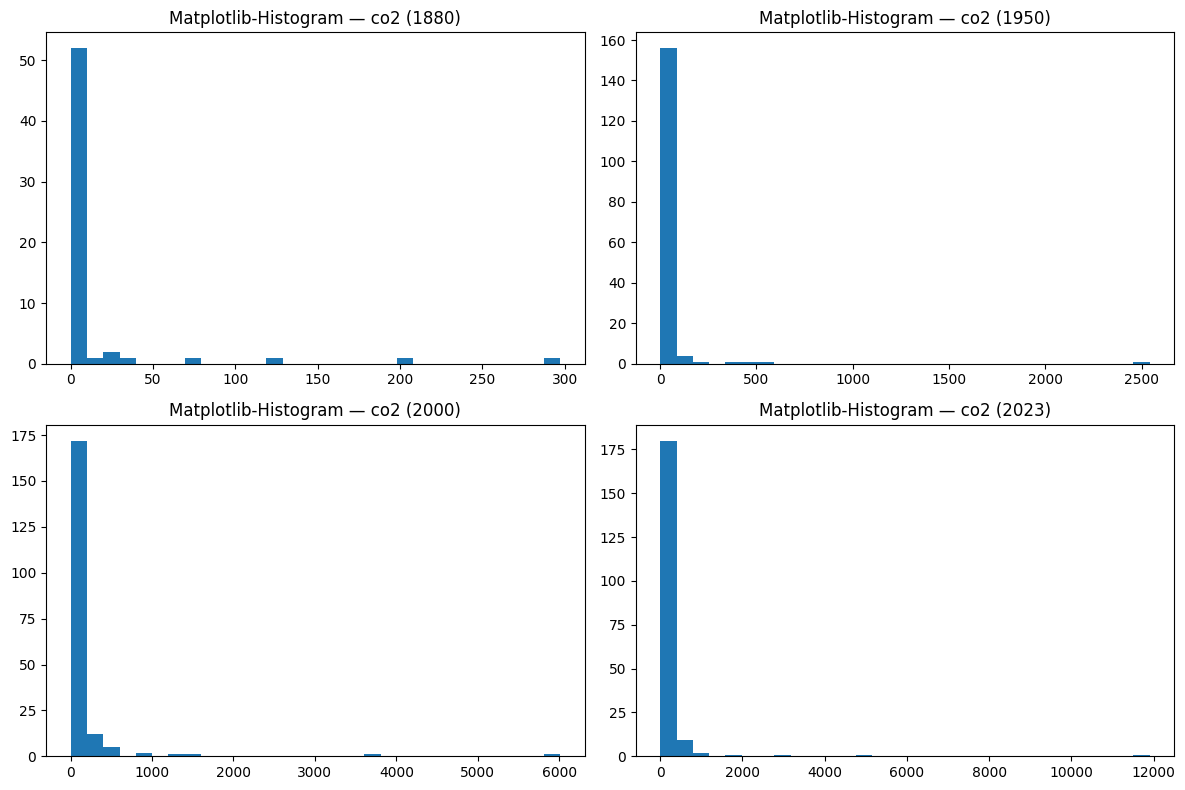

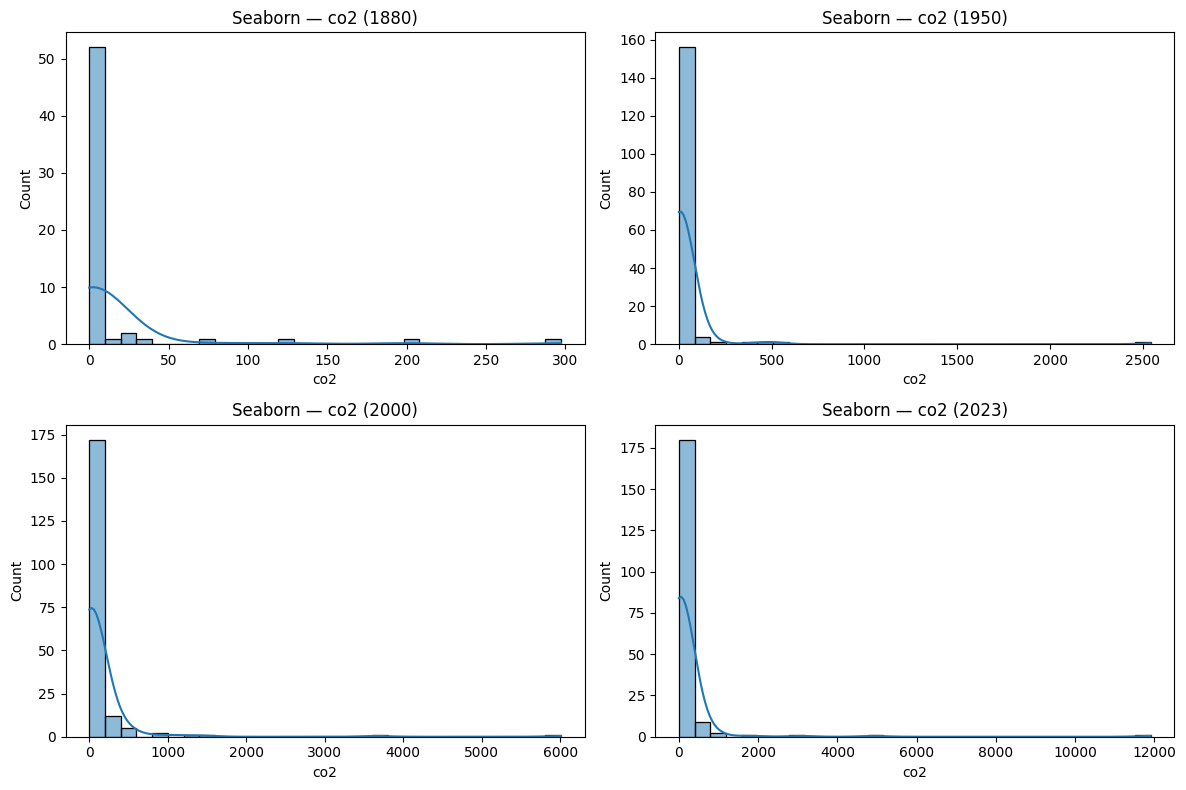

In [29]:

# -----------------------
# 1) Matplotlib
# -----------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))     # ÂàõÂª∫‰∏Ä‰∏™ 2x2 ÁöÑÂ≠êÂõæÁΩëÊ†º; figsize=(12,8) ËÆæÂÆöÊï¥Âº†ÂõæÁöÑÂÆΩ√óÈ´òÔºàËã±ÂØ∏);ËøîÂõû figÔºàÊï¥Âº†ÂõæÂØπË±°ÔºâÂíå axesÔºà2√ó2 ÁöÑ Axes Êï∞ÁªÑÔºâ„ÄÇ
axes = axes.flatten()                               # Êää 2x2 ÁöÑ Axes Êï∞ÁªÑÊëäÂπ≥Êàê‰∏ÄÁª¥Êï∞ÁªÑÔºåÊñπ‰æøÊñπ‰æøÁî® axes[i] ÊåâÁ¥¢ÂºïËÆøÈóÆ,ÂèØ‰ª•Áî® for Âæ™ÁéØÈÅçÂéÜ„ÄÇ

for i, y in enumerate(rep):
    dff = df_feat[df_feat[year_col]==y]             #  ‰ªé df_feat ‰∏≠Á≠õÈÄâÂá∫ ‚ÄãÂπ¥‰ªΩÁ≠â‰∫éÂΩìÂâçÂπ¥‰ªΩ y ÁöÑÊâÄÊúâË°åÔºåÂ≠òÂÖ•‰∏Ä‰∏™Êñ∞ÁöÑ DataFrame dff.
    xx = dff[total_col].dropna().astype(float)      # ÂèñÂá∫ dff ‰∏≠ÁöÑ‚ÄúÊÄªÊéíÊîæ‚ÄùÂàóÔºåÂéªÊéâÁº∫Â§±ÂÄºÂπ∂ËΩ¨‰∏∫ float Á±ªÂûãÔºåÂ≠òÂÖ• xx„ÄÇ
    axes[i].hist(xx, bins=30)                       # Âú®Á¨¨ i ‰∏™Â≠êÂõæ‰∏äÁªòÂà∂Áõ¥ÊñπÂõæÔºåxËΩ¥ÊòØvalue ,ÂàÜÊàê 30 ‰∏™binÔºàbins=30Ôºâ,yËΩ¥ÊòØÊîæÂÖ•ÊØè‰∏™binÈáåÁöÑÂõΩÂÆ∂Êï∞Èáè„ÄÇ
    axes[i].set_title(f"Matplotlib-Histogram ‚Äî {total_col} ({y})")

# enumerate() ÊòØ Python ÁöÑ‰∏Ä‰∏™ÂÜÖÁΩÆÂáΩÊï∞ÔºåÂÆÉÁöÑ‰ΩúÁî®ÊòØÔºö
# 	‚ÄãÁªô‰∏Ä‰∏™ÂèØËø≠‰ª£ÂØπË±°ÔºàÊØîÂ¶ÇÂàóË°®„ÄÅÂÖÉÁªÑ„ÄÅÂ≠óÁ¨¶‰∏≤Á≠âÔºâÁöÑÊØè‰∏Ä‰∏™ÂÖÉÁ¥†ÔºåÈôÑÂä†‰∏Ä‰∏™‚ÄúÂ∫èÂè∑‚ÄùÔºàÂç≥Á¥¢ÂºïÔºâÔºå‰ªé 0 ÂºÄÂßã„ÄÇ‚Äã

# rep = [1990, 2000, 2010]
# for i, y in enumerate(rep):
#     print(i, y)

# ËøêË°åÁªìÊûú‰ºöÊòØÔºö

# 0 1990
# 1 2000
# 2 2010

# ‚Ä¢ enumerate(rep) ‰ºö‰∏∫ rep ‰∏≠ÁöÑÊØè‰∏Ä‰∏™ÂÖÉÁ¥†Ôºå‚ÄãËá™Âä®ÁîüÊàê‰∏Ä‰∏™Â∫èÂè∑ÔºàÁ¥¢ÂºïÔºâÂíåÂØπÂ∫îÁöÑÂÄº„ÄÇ
# ‚Ä¢ Âú®ÊØèÊ¨°Âæ™ÁéØ‰∏≠Ôºö 
# 	‚Ä¢ i ÊòØÂΩìÂâçÂÖÉÁ¥†ÁöÑ ‚ÄãÁ¥¢ÂºïÔºà‰ªé 0 ÂºÄÂßãÔºâ‚Äã‚Äã
# 	‚Ä¢ y ÊòØÂΩìÂâçÂÖÉÁ¥†ÁöÑ ‚ÄãÂÄº

plt.tight_layout()
plt.show()

# -----------------------
# 2) Seaborn
# -----------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, y in enumerate(rep):
    dff = df_feat[df_feat[year_col]==y]
    xx = dff[total_col].dropna().astype(float)
    sns.histplot(xx, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Seaborn ‚Äî {total_col} ({y})")

plt.tight_layout()
plt.show()

# -----------------------
# 3) Plotly
# -----------------------
rows = 2
cols = 2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{y}" for y in rep])

for i, y in enumerate(rep):
    dff = df_feat[df_feat[year_col]==y]
    row, col = divmod(i, cols)
    row += 1; col += 1
    fig.add_trace(
        go.Histogram(x=dff[total_col], nbinsx=30, name=str(y)),
        row=row, col=col
    )

fig.update_layout(
    title=f"Plotly Histogram ‚Äî {total_col}",
    showlegend=False,
    height=800, width=1000
)
fig.show()


In [30]:
import pandas as pd
import numpy as np
import plotly.express as px

country_col = "Name"
year_col    = "year"
total_col   = "co2"

def top10_plus_others(df_year, k=10):
    d = (df_year[[country_col, total_col]]
         .dropna(subset=[total_col])
         .groupby(country_col, as_index=False)[total_col].sum()
         .sort_values(total_col, ascending=False))
    if d.empty or d[total_col].sum() <= 0:
        return pd.DataFrame(columns=[country_col, total_col])
    top10 = d.head(k)
    rest_val = d[total_col].sum() - top10[total_col].sum()
    if rest_val > 0:
        top10 = pd.concat([top10, pd.DataFrame({country_col:["Others"], total_col:[rest_val]})],
                          ignore_index=True)
    return top10

for y in rep:
    dyear = df_feat[df_feat[year_col] == y]
    if dyear.empty:
        print(f"[{y}] Ê≤°ÊúâÊï∞ÊçÆÔºåË∑≥Ëøá")
        continue

    data_show = top10_plus_others(dyear, k=10)
    if data_show.empty:
        print(f"[{y}] Êó†ÊúâÊïà CO‚ÇÇ Êï∞ÊçÆÔºåË∑≥Ëøá")
        continue

    # Âª∫‰∏Ä‰∏™Ê†πËäÇÁÇπÔºå‰æø‰∫é‰ΩøÁî® percentRoot ÊòæÁ§∫‚ÄúÁõ∏ÂØπÊÄªÈáè‚ÄùÁöÑÂç†ÊØî
    data_show["parent"] = f"Total {y}"

    fig = px.treemap(
        data_show,
        path=["parent", country_col],      # Â±ÇÁ∫ßÔºöÊÄªÈáè -> ÂõΩÂÆ∂ÔºàÂê´ OthersÔºâ
        values=total_col,
        title=f"Top 10 + Others CO‚ÇÇ Treemap ‚Äî {y}",
        # ÂèØÈÄâÔºöÁªô Others ‰∏ä‰∏™Âõ∫ÂÆöÈ¢úËâ≤
        # color=country_col,
        # color_discrete_map={"Others": "lightgrey"}
    )

    # Âú®ÊñπÂùó‰∏äÁõ¥Êé•ÊòæÁ§∫‚ÄúÂõΩÂÆ∂Âêç + ÁôæÂàÜÊØî‚ÄùÔºàÁõ∏ÂØπÊ†πËäÇÁÇπÔºâ
    # percentRoot ÊòØ 0~1ÔºõÁî® .1% Ê†ºÂºèÊòæÁ§∫‰∏∫ÁôæÂàÜÊØîÔºà1‰ΩçÂ∞èÊï∞Ôºâ
    fig.update_traces(
        textinfo="label+percent root",                     # ÊñπÂùóÊòæÁ§∫ÂêçÁß∞ + Âç†ÊØî
        texttemplate="%{label}<br>%{percentRoot:.1%}",     # ÊñπÂùó‰∏äÁöÑÊñáÂ≠ó
        hovertemplate=(
            "<b>%{label}</b><br>"
            "Share: %{percentRoot:.2%}<br>"
            "CO‚ÇÇ: %{value:,.0f} MtCO‚ÇÇ"                     # ÊòæÁ§∫Êï∞ÂÄºÔºàÂçï‰ΩçÔºöMtCO‚ÇÇÔºâ
            "<extra></extra>"
        )
    )


    # ËÆ©Â∞èÂùóÊó∂Ëá™Âä®ÈöêËóèÊñáÂ≠óÔºåÈÅøÂÖçÊå§‰Ωú‰∏ÄÂõ¢
    fig.update_layout(
        uniformtext_minsize=10,
        uniformtext_mode="hide",
        margin=dict(t=50, l=10, r=10, b=10)
    )

    # Ê†πËäÇÁÇπÈ¢úËâ≤
    fig.update_traces(root_color="lightgrey")
    fig.show()


In [31]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

country_col = "Name"
year_col    = "year"
total_col   = "co2"

def pareto_fig(df_year, y):
    d = (df_year[[country_col, total_col]]
         .dropna(subset=[total_col])
         .groupby(country_col, as_index=False)[total_col].sum()
         .sort_values(total_col, ascending=False))
    if d.empty: 
        return None
    d["cum_share"] = d[total_col].cumsum() / d[total_col].sum()

    fig = go.Figure()
    fig.add_bar(x=d[country_col], y=d[total_col], name="CO‚ÇÇ")
    fig.add_scatter(x=d[country_col], y=d["cum_share"], name="Cumulative share", mode="lines+markers", yaxis="y2")
    fig.update_layout(
        title=f"Pareto ‚Äî CO‚ÇÇ by Country in {y}",
        xaxis_title="Country",
        yaxis_title="CO‚ÇÇ",
        yaxis2=dict(title="Cumulative share", overlaying="y", side="right", range=[0,1]),
        xaxis=dict(tickangle=45),
        margin=dict(t=60, l=40, r=40, b=120)
    )
    return fig

for y in rep:
    dyear = df_feat[df_feat[year_col] == y]
    if dyear.empty:
        print(f"[{y}] Ê≤°ÊúâÊï∞ÊçÆÔºåË∑≥Ëøá")
        continue
    fig = pareto_fig(dyear, y)
    if fig is None:
        print(f"[{y}] Êó†ÊúâÊïà CO‚ÇÇ Êï∞ÊçÆ")
    else:
        fig.show()


In [33]:
# --- Part2: Folium Map (improved) ---
import pathlib, requests, folium
import numpy as np
import pandas as pd

# 1) ÂèñÊúÄÊñ∞year + ÈùûÁ©∫ËøáÊª§
map_year = int(df_feat[year_col].max())
print("Âú∞ÂõæÂπ¥‰ªΩ:", map_year)
df_latest = df_feat[df_feat[year_col] == map_year].copy()

# 2) ‰ªÖ‰øùÁïôcountry‰∏éÊï∞ÂÄº‰∏§columnÔºå‰∏¢Êéâ NaN/Êó†Á©∑/Ë¥üÂÄº
d = df_latest[[country_col, total_col]].copy()
d[total_col] = pd.to_numeric(d[total_col], errors="coerce").replace([np.inf, -np.inf], np.nan)
d = d.dropna(subset=[total_col])
d = d[d[total_col] >= 0]

# 3) ÊåâcountryÊ±áÊÄªÔºàÊúâ‰∫õÊï∞ÊçÆ‰ºöÊúâÈáçÂ§çË°åÔºâ
d = d.groupby(country_col, as_index=False)[total_col].sum()

# 4) normalizecountryÂêçÔºåÂ∞ΩÈáèË¥¥Âêà GeoJSON ÁöÑÂêçÂ≠ó
name_fix = {
    "United States": "United States of America",
    "Russia": "Russian Federation",
    "Czechia": "Czech Republic",
    "Myanmar (Burma)": "Myanmar",
    "Vietnam": "Viet Nam",
    "Syria": "Syrian Arab Republic",
    "Iran": "Iran (Islamic Republic of)",
    "Moldova": "Republic of Moldova",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Congo (Brazzaville)": "Republic of the Congo",
    "Tanzania": "United Republic of Tanzania",
    "South Korea": "Republic of Korea",
    "North Korea": "Democratic People's Republic of Korea",
    "Laos": "Lao People's Democratic Republic",
    "Ivory Coast": "C√¥te d'Ivoire",
    "Swaziland": "Eswatini",
    "Cape Verde": "Cabo Verde",
    "Palestine": "Palestine, State of",
    "Micronesia": "Micronesia (Federated States of)",
    "Bahamas": "Bahamas",
    # ‰Ω†Ëã•ÁúãÂà∞graycountryÔºåÂÜçÊääÂÆûÈôÖÂêçÂ≠ó‰∏é GeoJSON ÂêçÂ≠óË°•Âà∞ËøôÈáå
}
d["country_norm"] = d[country_col].replace(name_fix)

# 5) ‰∏ãËΩΩ/read GeoJSON
geojson_path = pathlib.Path("../data/world-countries.json")
if not geojson_path.exists():
    try:
        url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
        r = requests.get(url, timeout=30); r.raise_for_status()
        geojson_path.write_bytes(r.content)
        print("[Downloaded] world-countries.json")
    except Exception as e:
        print("[Warn] Êó†Ê≥ï‰∏ãËΩΩ GeoJSON:", e)

# 6) ÂàõÂª∫mapÔºöËÆæÂÆöÊõ¥Â∞èÁöÑÂ∞∫ÂØ∏ + Êéß‰ª∂
m = folium.Map(
    location=[20, 0],
    zoom_start=2,
    # tiles="cartodbpositron",
    tiles=None,          # ÂÖà‰∏çÁî®ÈªòËÆ§Â∫ïÂõæ
    width="100%",    # ÊàñËÄÖÂÖ∑‰ΩìÂÉèÁ¥†: 900
    # width=900,
    # height=480,      # Áº©Â∞èÈ´òÂ∫¶
    control_scale=True,
    max_bounds=True,     # ÈôêÂà∂ËßÜÂüüÂú®‰∏ñÁïåËåÉÂõ¥
    max_bounds_viscosity=1.0
)

# Ê∑ªÂä†‰∏çÂπ≥Èì∫ÁöÑÂ∫ïÂõæÔºàÂÖ≥ÈîÆÔºöno_wrap=TrueÔºâ
folium.TileLayer(
    'cartodbpositron',
    name='CartoDB Positron',
    control=False,
    no_wrap=True
).add_to(m)

# 7) ÁùÄËâ≤mapÔºàÂè™Âú® GeoJSON Â≠òÂú®Êó∂Ôºâ
if geojson_path.exists():
    chor = folium.Choropleth(
        geo_data=str(geojson_path),
        data=d,
        columns=["country_norm", total_col],
        key_on="feature.properties.name",
        fill_color="YlOrRd",
        fill_opacity=0.8,
        line_opacity=0.2,
        nan_fill_color="lightgray",
        legend_name=f"{total_col} ({map_year})"
    ).add_to(m)

    # 8) Â¢ûÂä† hover ÊèêÁ§∫ÔºàdisplaycountryÂêç‰∏éÊï∞ÂÄºÔºâ
    folium.GeoJsonTooltip(fields=["name"], aliases=["Country:"]).add_to(chor.geojson)

    # 9) Ëá™Âä®Áº©ÊîæÂà∞‰∏ñÁïåËåÉÂõ¥ÔºàÊàñÊ†πÊçÆÊï∞ÊçÆ boundsÔºâ
    try:
        m.fit_bounds([[-60, -180], [85, 180]])  # ÂÖ®ÁêÉËßÜÂõæ
    except Exception:
        pass
# Â∞ùËØïÂ∞ÜÂú∞ÂõæËá™Âä®Áº©ÊîæÂà∞ÂåÖÂê´ÂÖ®ÁêÉÁªùÂ§ßÈÉ®ÂàÜÂú∞Âå∫ÁöÑËåÉÂõ¥Ôºö
# Á∫¨Â∫¶ËåÉÂõ¥Ôºö-60¬∞ÔºàÂçóÁ∫¨ÔºåÈÅøÂºÄÂçóÊûÅÊ¥≤Ôºâ Âà∞ 85¬∞ÔºàÂåóÁ∫¨ÔºåÈÅøÂºÄÂåóÊûÅÊûÅÁÇπÈôÑËøëÁöÑÊï∞ÊçÆÁ©∫ÁôΩÔºâ„ÄÇ
# ÁªèÂ∫¶ËåÉÂõ¥Ôºö-180¬∞ Âà∞ 180¬∞„ÄÇ
# Â¶ÇÊûúÂá∫ÈîôÔºàÊØîÂ¶ÇÊï∞ÊçÆËåÉÂõ¥ÊúâÈóÆÈ¢òÔºâÔºåÂàôÂøΩÁï•ÂºÇÂ∏∏ÔºàpassÔºâ„ÄÇ

# 10) ÂèØÈÄâÔºö‰øùÂ≠ò HTML ‰æø‰∫éÊü•Áúã/Êèê‰∫§
# m.save("co2_choropleth_latest.html")

m  # Âú® Notebook ‰∏≠ÊòæÁ§∫

Âú∞ÂõæÂπ¥‰ªΩ: 2023


In [34]:

# Part2: Folium mapÔºàÊúÄÊñ∞Âπ¥Ôºâ Áî® Folium Áîª‰∏ÄÂº†ÂÖ®ÁêÉmapÔºådisplayÊúÄÊñ∞‰∏ÄÂπ¥ÁöÑÂêÑÂõΩ CO‚ÇÇ emissionsÈáèdistribution„ÄÇ
import requests, json

# Âèñ year_col ÁöÑÊúÄÂ§ßÂÄºÔºàÊúÄÊñ∞yearÔºâÔºå‰Ωú‰∏∫mapÂ±ïÁ§∫year„ÄÇdf_latestÔºöÁ≠õÈÄâÂá∫Ëøô‰∏ÄÂπ¥ÁöÑÊï∞ÊçÆ„ÄÇ
map_year = int(df_feat[year_col].max()); print("Âú∞ÂõæÂπ¥‰ªΩ:", map_year)
df_latest = df_feat[df_feat[year_col]==map_year].copy()

# ÊåâcountryÊ±áÊÄªÔºàÊúâ‰∫õcountryÂèØËÉΩÊúâÂ§ö‰∏™ËÆ∞ÂΩïÔºâÔºåÂπ∂ÁîüÊàê‰∏Ä‰∏™‚ÄúÊ†áÂáÜÂåñcountryÂêç‚ÄùcolumnÔºåÊñπ‰æøÂêéÁª≠Âíå GeoJSON ÈáåÁöÑcountryÂêçÂØπÈΩê„ÄÇ‰øùÁïô‰∏§columnÔºöcountryÂêç (country_col) ÂíåÊÄªemissionsÈáè (total_col)„ÄÇresultÔºöÊØè‰∏™countryÂú®ËØ•Âπ¥ÂØπÂ∫î‰∏Ä‰∏™ÊÄªemissionsÈáè„ÄÇ
df_geo = df_latest[[country_col, total_col]].groupby(country_col, as_index=False).sum()

# normalizeÂõΩÂêçÔºåÈÅøÂÖçmapmatchÂ§±Ë¥•
name_fix = {"United States":"United States of America","Russia":"Russian Federation"}
df_geo["country_norm"] = df_geo[country_col].replace(name_fix)


# read/‰∏ãËΩΩ GeoJSON ËæπÁïåÊñá‰ª∂
geojson_path = pathlib.Path("../data/world-countries.json")
if not geojson_path.exists():
    try:
        r = requests.get("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json", timeout=30)
        r.raise_for_status(); geojson_path.write_bytes(r.content); print("[Downloaded] world-countries.json")
    except Exception as e:
        print("[Warn] Êó†Ê≥ï‰∏ãËΩΩ GeoJSON:", e)

# ÂàõÂª∫mapÂØπË±°,initialize‰∏ÄÂº†mapÔºölocation=[20,0] ‚Üí map‰∏≠ÂøÉÁÇπÂú®ÁªèÁ∫¨Â∫¶ (20¬∞N, 0¬∞E)ÔºåÂ§ßÁ∫¶Âú®ÈùûÊ¥≤‰∏≠ÈÉ®Ôºå‰øùËØÅÂÖ®ÁêÉÂ±Ö‰∏≠display„ÄÇzoom_start=2 ‚Üí ÂàùÂßãÁº©ÊîæÁ∫ßÂà´ÔºåËÉΩÁúãÂà∞Êï¥‰∏™‰∏ñÁïå„ÄÇtiles="cartodbpositron" ‚Üí ‰ΩøÁî®ÁÅ∞ÁôΩÂ∫ïÂõæÔºåÁ™ÅÂá∫Êï∞ÊçÆÈ¢úËâ≤„ÄÇ
m = folium.Map(location=[20,0], zoom_start=2, tiles="cartodbpositron")

# ÁªòÂà∂ ChoroplethÔºàÂàÜÁ∫ßÁùÄËâ≤mapÔºâgeo_dataÔºöcountryËæπÁïå GeoJSON Êñá‰ª∂„ÄÇdataÔºö‰Ω†ÁöÑ DataFrameÔºàcountryÂêç + ÂØπÂ∫îemissionsÂÄºÔºâ„ÄÇolumnsÔºö["countryÂêç","Êï∞ÂÄº"] ‚Üí ÊåáÂÆömatchÂÖ≥Á≥ª„ÄÇ
if geojson_path.exists():
    folium.Choropleth(geo_data=str(geojson_path), data=df_geo, columns=["country_norm", total_col],
                      key_on="feature.properties.name", fill_color="YlOrRd", fill_opacity=0.7, line_opacity=0.2,
                      nan_fill_color="lightgray", legend_name=f"{total_col} ({map_year})").add_to(m)
# geo_dataÔºöcountryËæπÁïå GeoJSON Êñá‰ª∂„ÄÇ
# dataÔºö‰Ω†ÁöÑ DataFrameÔºàcountryÂêç + ÂØπÂ∫îemissionsÂÄºÔºâ„ÄÇ
# columnsÔºö["countryÂêç","Êï∞ÂÄº"] ‚Üí ÊåáÂÆömatchÂÖ≥Á≥ª„ÄÇ
# key_on="feature.properties.name"ÔºöÂëäËØâ Folium Áî® GeoJSON ÈáåcountryÁöÑ name Â±ûÊÄßÊù•match„ÄÇ
# fill_color="YlOrRd"ÔºöÈ¢úËâ≤Ê∏êÂèòÔºàÈªÑËâ≤ ‚Üí Á∫¢Ëâ≤ÔºâÔºåË°®Á§∫emissionsÈáè‰ªé‰ΩéÂà∞È´ò„ÄÇ
# nan_fill_color="lightgray"ÔºöÊï∞ÊçÆmissingÁöÑcountrydisplay‰∏∫gray„ÄÇ
# legend_nameÔºömapÂè≥‰∏ãËßídisplayÁöÑÂõæ‰æãÊ†áÈ¢ò„ÄÇ

m

Âú∞ÂõæÂπ¥‰ªΩ: 2023


In [35]:

# Part3: JupyterDash Â∞è‰ª™Ë°®Êùø
# --- Dash in Notebook: robust launcher (works for Dash >=2.11 and older) ---
# df is cleaned DataFrame, inclulding all columns
import dash
from packaging.version import Version

# ‰Ω†ÁöÑÊï∞ÊçÆÂáÜÂ§á‰∏çÂèò
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()                       # ‰ªéÂéüÂßãÊï∞ÊçÆ(cleaned) df ‰∏≠Á≠õÈÄâÂá∫ÊâÄÊúâÊï∞ÂÄºÂûãÂàóÁöÑÂàóÂêçÔºåÂ≠òÂÖ•ÂàóË°® numeric_cols„ÄÇ
preferred = [c for c in ["total_col","co2_per_capita","share_global_co2",                   # ÂÆö‰πâ‰∫Ü‰∏Ä‰∏™‰Ω†‰ºòÂÖàÂ±ïÁ§∫ÁöÑÊåáÊ†áÂàóË°®‚ÄãÔºàÊØîÂ¶ÇÊÄªÊéíÊîæÈáè total_col„ÄÅ‰∫∫ÂùáÊéíÊîæ co2_per_capita„ÄÅÁÖ§ÁÇ≠ÊéíÊîæ coal_co2 Á≠âÁ≠âÔºâ„ÄÇ
                         "coal_co2","oil_co2","gas_co2","cement_co2","flaring_co2"]
             if c in numeric_cols]
metrics = preferred if preferred else numeric_cols[:5]                                      # Â¶ÇÊûú‰ºòÂÖàÊåáÊ†áÂàóË°® preferred ‰∏ç‰∏∫Á©∫ÔºàÂç≥‰Ω†ÂÖ≥ÂøÉÁöÑÈÇ£‰∫õÊåáÊ†áÈÉΩÊòØÊï∞ÂÄºÂûãÔºâÔºåÈÇ£‰πàÂ∞±‰ΩøÁî®ÂÆÉ‰Ωú‰∏∫‰∏ãÊãâËèúÂçïÈÄâÈ°πÔºõ  
min_year = int(df[year_col].min()); max_year = int(df[year_col].max())

# ÂÖ¨ÂÖ±Â∏ÉÂ±Ä/ÂõûË∞ÉfunctionÂ∞ÅË£Ö
def build_app(app):
    from dash import html, dcc, Input, Output
    import plotly.express as px
    import numpy as np
    # Âª∂ËøüÂØºÂÖ• Dash ÁªÑ‰ª∂Âíå Plotly.ÊîæÂú®ÂáΩÊï∞ÂÜÖÈÉ®ÔºåËÄå‰∏çÊòØÂÖ®Â±ÄÈ°∂ÈÉ®„ÄÇ
# Â•ΩÂ§ÑÔºöÈÅøÂÖçÊ±°ÊüìÂÖ®Â±ÄÂëΩÂêçÁ©∫Èó¥Ôºå‰πüÈÅøÂÖçÂú®Êüê‰∫õÁéØÂ¢É‰∏ãÔºàÊØîÂ¶ÇÊú™ÂÆâË£Ö plotly/dash Êó∂ÔºâÂØºÂÖ•Â§±Ë¥•ÂØºËá¥ËÑöÊú¨Â¥©Ê∫É„ÄÇÁâπÂà´ÈÄÇÂêàÂ∞ÅË£ÖÊàêÂáΩÊï∞ÊàñÊ®°Âùó„ÄÇÔºàfunctionÂÜÖÂØºÂÖ•ÈÅøÂÖçÈ°∂Â±ÇÊ±°ÊüìÔºåÂêåÊó∂ÂÖºÂÆπ‰∏çÂêåÁéØÂ¢ÉÔºâ„ÄÇ

    
#     ÂÆö‰πâÈ°µÈù¢Â∏ÉÂ±ÄÔºöÔºàHTML + Êéß‰ª∂Ôºâ

    app.layout = html.Div([                                                             # Êï¥‰∏™‰ª™Ë°®ÁõòÁöÑÊúÄÂ§ñÂ±ÇÊòØ‰∏Ä‰∏™ html.DivÔºåÈáåÈù¢ÂåÖÂê´Ê†áÈ¢òÂíåÊéß‰ª∂Ôºå‰ª•Âèä‰∏§‰∏™ÂõæË°®„ÄÇ
        html.H3("CO‚ÇÇ Emissions Dashboard"),                                             # Á¨¨‰∏ÄÈÉ®ÂàÜÊòØÊ†áÈ¢òÔºö‚ÄúCO‚ÇÇ Emissions Dashboard‚Äù„ÄÇÊ†áÈ¢ò H3

#   Á¨¨‰∫åÈÉ®ÂàÜÊòØ‰∏Ä‰∫õÊéß‰ª∂Ôºö‰∏ãÊãâÊ°Ü„ÄÅÊªëÂùó„ÄÅÂçïÈÄâÊåâÈíÆÔºåÁî®Êà∑ÂèØ‰ª•ÈÄâÊã©ÊåáÊ†á„ÄÅÂπ¥‰ªΩÂíåÊï∞ÊçÆÂèòÊç¢ÊñπÂºè„ÄÇ
        html.Div([
            html.Label("Metric:"),
            dcc.Dropdown(options=[{"label": m, "value": m} for m in metrics],           # ‰∏ãÊãâÊ°Ü DropdownÔºöÈÄâÂì™‰∏Ä‰∏™ÊåáÊ†áÔºàÂ¶Ç co2„ÄÅcoal_co2‚Ä¶Ôºâ„ÄÇ
                         value=metrics[0], id="metric"),
            html.Label("Year:"),
            dcc.Slider(min_year, max_year, 1, value=max_year, marks=None,               # ÊªëÂùó SliderÔºöÈÄâÂπ¥‰ªΩÔºàËåÉÂõ¥‰∏∫ÊúÄÂ∞èÂà∞ÊúÄÂ§ßÂπ¥‰ªΩÔºåÈªòËÆ§ÊúÄÂ§ßÂπ¥Ôºâ„ÄÇ
                       tooltip={"always_visible": True}, id="year"),
            html.Label("Transform:"),
            dcc.RadioItems(options=[{"label":"Raw","value":"raw"},                      # ÂçïÈÄâ RadioItemsÔºöÈÄâÊï∞ÊçÆÂèòÊç¢ÔºàÂéüÂßã/raw„ÄÅÂØπÊï∞/log1p„ÄÅZ ÂàÜÊï∞/zscore„ÄÅMin-Max/minmaxÔºâ„ÄÇ
                                    {"label":"log1p","value":"log1p"},
                                    {"label":"zscore","value":"zscore"},
                                    {"label":"minmax","value":"minmax"}],
                           value="raw", id="transform", inline=True)
        ], style={"maxWidth":"760px"}),
        # html.Div([dcc.Graph(id="hist"), dcc.Graph(id="map")])                           # ‰∏§‰∏™ Graph ÂÆπÂô®ÔºödisplayhistogramÂíåmap„ÄÇ
        html.Div([                                                                        # Áî®ÂÜÖËÅîÊ†∑ÂºèÊää‰∏§‰∏™ÂõæÊîæÂú®‰∏ÄË°åÔºåÂÆΩÂ∫¶ÂêÑÂç† 48%ÔºåÈ´òÂ∫¶ 400px„ÄÇ
            dcc.Graph(id="hist", style={"width":"48%", "display":"inline-block", "height":"400px"}),
            dcc.Graph(id="map", style={"width":"48%", "display":"inline-block", "height":"400px"})
            ])

    ])


    # ÂÆö‰πâ‰∏Ä‰∏™ÂõûË∞ÉfunctionÔºöÂΩì metric / year / transform ‰ªª‰∏ÄÊîπÂèòÊó∂ÔºåÈáçÊñ∞ËÆ°ÁÆóÂπ∂ËøîÂõû‰∏§Âº†ÂõæÔºàhistogramÂíåmapÔºâ„ÄÇÂÆö‰πâ‰∫§‰∫íÂõûË∞ÉÂáΩÊï∞ÔºöÂä®ÊÄÅÊõ¥Êñ∞ÂõæË°®
    @app.callback(Output("hist","figure"), Output("map","figure"),                                  # ÂΩì‰ª•‰∏ã‰ªªÊÑè‰∏Ä‰∏™ËæìÂÖ•ÁªÑ‰ª∂ÂèëÁîüÂèòÂåñÊó∂ÔºöÁî®Êà∑ÈÄâÊã©‰∫Ü‰∏çÂêåÁöÑÊåáÊ†áÔºàmetricÔºâ,Êà∑ÊªëÂä®ÈÄâÊã©‰∫Ü‰∏çÂêåÂπ¥‰ªΩÔºàyearÔºâ,Áî®Êà∑ÈÄâÊã©‰∫Ü‰∏çÂêåÁöÑÊï∞ÊçÆÂèòÊç¢ÊñπÂºèÔºàtransformÔºâ,ÈÇ£‰πàÂ∞±‰ºöËß¶Âèë‰∏ãÈù¢ÁöÑÂáΩÊï∞ÔºåÈáçÊñ∞ËÆ°ÁÆóÂπ∂Êõ¥Êñ∞‰∏§‰∏™ËæìÂá∫ÁªÑ‰ª∂ÔºöÁõ¥ÊñπÂõæÔºàhistÔºâÂú∞ÂõæÔºàmapÔºâ
                  Input("metric","value"), Input("year","value"), Input("transform","value"))
    def update(metric, year, transform):                # ÂõûË∞ÉÂáΩÊï∞
        # dff = df[df[year_col]==year].copy()                         # dffÔºöÂèñÂá∫ËØ•Âπ¥‰ªΩÁöÑÊï∞ÊçÆÂ≠êÈõÜ
        dff = df[(df[year_col] == year) & (df[description_col] == "Country")].copy()    # dffÔºöÂèñÂá∫ËØ•Âπ¥‰ªΩ‰∏î Description == "Country" ÁöÑÊï∞ÊçÆÂ≠êÈõÜ        # dffÔºöÂèñÂá∫ËØ•Âπ¥‰ªΩ‰∏î DescriptionÔºà‰∏çÂå∫ÂàÜÂ§ßÂ∞èÂÜôÔºâÁ≠â‰∫é "country" ÁöÑÊï∞ÊçÆÂ≠êÈõÜ
        series = pd.to_numeric(dff[metric], errors="coerce")        # seriesÔºöÂèñÂá∫ËØ•Âπ¥ÊâÄÈÄâÊåáÊ†áÂàóÔºåËΩ¨‰∏∫Êï∞ÂÄºÔºàÈùûÊ≥ïÂÄºÂèò NaNÔºâ
        if transform=="log1p":                                  # Ê†πÊçÆÈÄâÊã©ÁöÑÂèòÊç¢ÊñπÂºèÔºå‰∏âÁßçÂèòÊç¢Ôºölog1pÔºöÂØπÊï∞ÂéãÁº©ÔºåÈÄÇÂêàÊûÅÂè≥ÂÅèÁöÑÊÄªÈáèÊï∞ÊçÆÔºàÈÅøÂÖçÂ§ßÂõΩ‚ÄúÊ∑πÊ≤°‚ÄùÂ∞èÂõΩÔºâ„ÄÇzscoreÔºöÊ†áÂáÜÂåñÂà∞ÂùáÂÄº 0„ÄÅÊñπÂ∑Æ 1ÔºåÈÄÇÂêàÊØîËæÉ‚ÄúÈ´ò‰∫é/‰Ωé‰∫éÂπ≥ÂùáÂÄºÂ§öÂ∞ë‚Äù„ÄÇminmaxÔºöÁº©ÊîæÂà∞ 0~1ÔºåÈÄÇÂêàÂú®Áªü‰∏ÄÈáèÁ∫≤‰∏ãÂØπÊØî„ÄÇ
                                                                # elseÔºàrawÔºâ‰∏çÂ§ÑÁêÜ„ÄÇÂ∏¶Êúâ if sd>0„ÄÅif mx>mn ÁöÑ‰øùÊä§ÔºåÈÅøÂÖçÈô§Èõ∂„ÄÇ
            series = np.log1p(series.clip(lower=0))
        elif transform=="zscore":
            mu, sd = np.nanmean(series), np.nanstd(series, ddof=0)
            series = (series-mu)/sd if sd>0 else series*0
        elif transform=="minmax":
            mn, mx = np.nanmin(series), np.nanmax(series)
            series = (series-mn)/(mx-mn) if mx>mn else series*0
        
        dff["_metric_view_"] = series                           # ÊääÂèòÊç¢ÂêéÁöÑÁªìÊûúÊîæÂà∞ dff["_metric_view_"] ÂàóÔºåÊñπ‰æøÁîªÂõæÊó∂ÂºïÁî®„ÄÇ    
        fig_hist = px.histogram(dff, x="_metric_view_", nbins=30,                               # A. ÁªòÂà∂Áõ¥ÊñπÂõæÔºàÂàÜÂ∏ÉÂõæÔºâÁî® Plotly ÁîªÁõ¥ÊñπÂõæÔºöÂ±ïÁ§∫‚ÄúÊâÄÈÄâÂπ¥‰ªΩÔºåÂêÑÂõΩËØ•ÊåáÊ†áÔºàÁªèÂèòÊç¢ÂêéÔºâÁöÑÂàÜÂ∏ÉÂΩ¢ÊÄÅ‚Äù„ÄÇ
                                title=f"Histogram ‚Äî {metric} ({year}) [{transform}]")
        fig_map = px.choropleth(dff, locations=country_col, locationmode="country names",       # Áî® Plotly Áîª ChoroplethÔºàÂàÜÁ∫ßÁùÄËâ≤Âú∞ÂõæÔºâÔºöÂ±ïÁ§∫‚ÄúÊâÄÈÄâÂπ¥‰ªΩÔºåÂêÑÂõΩËØ•ÊåáÊ†áÔºàÁªèÂèòÊç¢ÂêéÔºâÁöÑÂú∞ÁêÜÂàÜÂ∏É‚Äù„ÄÇËÆæÁΩÆÂú∞ÁêÜÊ†∑ÂºèÔºöÊòæÁ§∫ÂõΩÁïå/Êµ∑Â≤∏Á∫øÔºå‰ΩøÁî®Ëá™ÁÑ∂Âú∞ÁêÜÊäïÂΩ±ÔºåÊî∂Á¥ßËæπË∑ù„ÄÇËøîÂõû‰∏§Âº†ÂõæÔºåDash ‰ºöËá™Âä®ÊääÂÆÉ‰ª¨ÊîæÂà∞ÂØπÂ∫îÁöÑ Graph ÁªÑ‰ª∂Èáå„ÄÇ
                                color="_metric_view_", hover_name=country_col,
                                title=f"Choropleth ‚Äî {metric} ({year}) [{transform}]",
                                color_continuous_scale="YlOrRd")
        fig_map.update_geos(showcountries=True, showcoastlines=True, projection_type="natural earth")   #‰ºòÂåñÂú∞ÂõæÊòæÁ§∫ÊïàÊûúÔºöÊòæÁ§∫ÂõΩÁïåÂíåÊµ∑Â≤∏Á∫øÔºå‰ΩøÁî®Ëá™ÁÑ∂Âú∞ÁêÉÊäïÂΩ±„ÄÇË∞ÉÊï¥ËæπË∑ùÔºåËÆ©Âú∞ÂõæÊòæÁ§∫Êõ¥Á¥ßÂáëÁæéËßÇ„ÄÇ
        fig_map.update_layout(margin=dict(l=0,r=0,t=50,b=0))
        return fig_hist, fig_map                            # ËøîÂõû‰∏§Âº†ÂõæÔºåÂõûË∞ÉÂáΩÊï∞ËøîÂõû‰∏§‰∏™ Figure ÂØπË±°ÔºåDash ‰ºöËá™Âä®Â∞ÜÂÆÉ‰ª¨ÂàÜÂà´Ê∏≤ÊüìÂà∞È°µÈù¢‰∏äÁöÑ id="hist" Âíå id="map" ÁöÑ Graph ÁªÑ‰ª∂‰∏≠„ÄÇ

# --- Êñ∞ÊñπÂºèÔºöDash>=2.11 Áõ¥Êé•Âú® Notebook ÂÜÖËÅîËøêË°å ---
if Version(dash.__version__) >= Version("2.11.0"):
    from dash import Dash, jupyter_dash
    jupyter_dash.default_mode = "inline"     # ‰πüÂèØÁî® "external"/"tab"/"jupyterlab"
    app = Dash(__name__)
    build_app(app)
    app.run(jupyter_mode="inline", port=8052, jupyter_height=900)

# --- ÊóßÊñπÂºèÔºöDash<2.11 ‰ΩøÁî® JupyterDash ---
else:
    from jupyter_dash import JupyterDash
    app = JupyterDash(__name__)
    build_app(app)
    app.run_server(mode="inline", port=8052, height=600)

C:\Users\wumin\AppData\Local\Temp\ipykernel_3020\939678602.py:73: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

